In [1]:
# ===========================
# Bike Sharing Demand EDA
# ===========================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 2: Load the Dataset
train = pd.read_excel("/content/train.csv.xlsx")
 # Make sure train.csv is in your working directory

In [8]:
# Quick view
print(train.head())
print(train.info())
print(train.describe())


             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    108

In [9]:
# Step 3: Clean and Prepare Data

# Convert datetime column to datetime type
train['datetime'] = pd.to_datetime(train['datetime'])


In [10]:
# Extract new features from datetime
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['weekday'] = train['datetime'].dt.weekday  # 0=Monday, 6=Sunday


In [11]:
# Convert numeric codes to categorical where needed
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'weekday', 'hour']
for col in categorical_features:
    train[col] = train[col].astype('category')

In [12]:
# Step 4: Check for missing values
print(train.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
year          0
weekday       0
dtype: int64


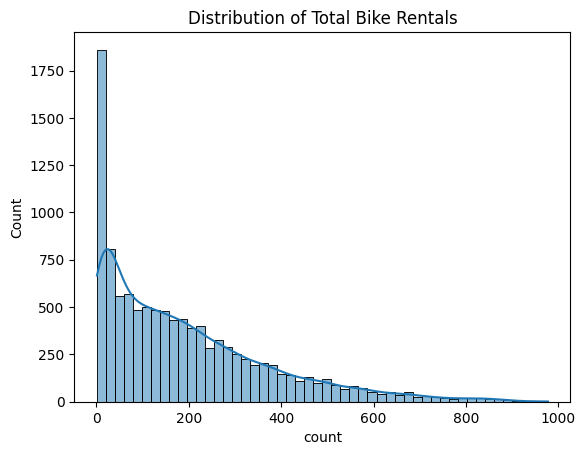

In [13]:
# Step 5: Exploratory Data Analysis (EDA)

# 5.1 Distribution of Total Bike Rentals (target)
plt.figure()
sns.histplot(train['count'], bins=50, kde=True)
plt.title("Distribution of Total Bike Rentals")
plt.show()
